In [2]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.11.4'

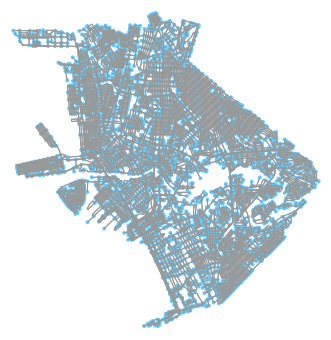

In [3]:
# get a graph for some city
G = ox.graph_from_place('Manila, Philippines', network_type='walk')
fig, ax = ox.plot_graph(G)

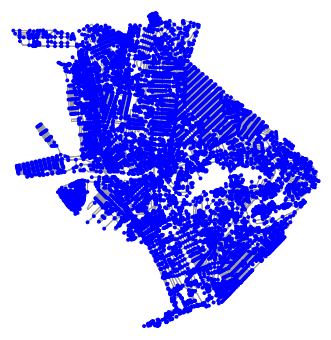

In [16]:
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

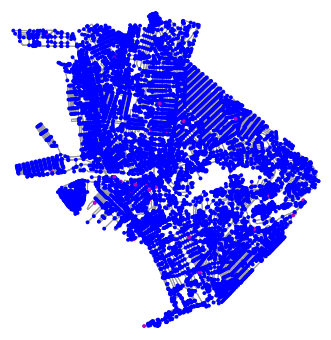

In [18]:
loops = [edge[0] for edge in nx.selfloop_edges(G)]
nc = ['m' if node in loops else 'b' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

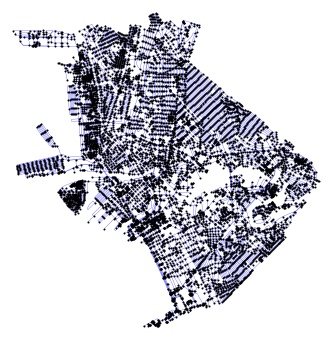

In [21]:
# highlight one-way streets
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=1, node_zorder=3, 
                           edge_color=ec, edge_linewidth=0.25, edge_alpha=0.5)

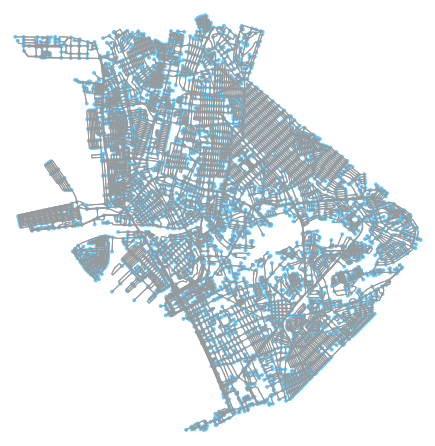

In [4]:
G_projected = ox.project_graph(G)
fig, ax = ox.plot_graph(G_projected, save=True, file_format='svg')

In [5]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

56566107.712543845

In [6]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 9306,
 'm': 28192,
 'k_avg': 6.058886739737804,
 'intersection_count': 8156,
 'streets_per_node_avg': 3.044272512357619,
 'streets_per_node_counts': {0: 0,
  1: 1150,
  2: 0,
  3: 5507,
  4: 2594,
  5: 47,
  6: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.12357618740597465,
  2: 0.0,
  3: 0.5917687513432194,
  4: 0.27874489576617234,
  5: 0.005050505050505051,
  6: 0.0008596604341285192},
 'edge_length_total': 2007600.8320000062,
 'edge_length_avg': 71.2117207718504,
 'street_length_total': 1010385.9680000009,
 'street_length_avg': 71.48114382737892,
 'street_segments_count': 14135,
 'node_density_km': 164.5154735993324,
 'intersection_density_km': 144.18527860263862,
 'edge_density_km': 35491.23164355198,
 'street_density_km': 17862.038044663663,
 'circuity_avg': 1.0473941487853358,
 'self_loop_proportion': 0.0027667423382519863,
 'clean_intersection_count': 4805,
 'clean_intersection_density_km': 84.94485822531615}

In [7]:
ox.save_graph_shapefile(G, filename='mynetwork_shapefile')
ox.save_graphml(G, filename='mynetwork.graphml')

In [8]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

In [9]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (14.601840, 120.973326))
dest_node = ox.get_nearest_node(G, (14.602052, 121.015432))

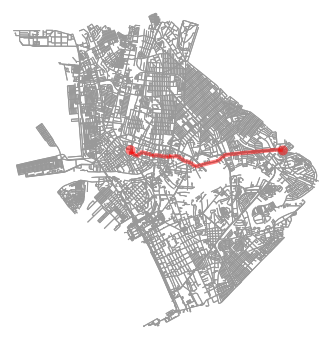

In [10]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [11]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

5046.901000000001

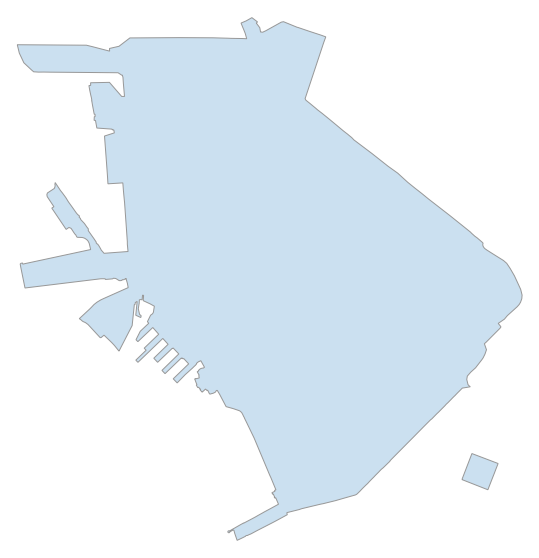

In [12]:
city = ox.gdf_from_place('Manila, Philippines')
ox.save_gdf_shapefile(city)
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(10,10))

In [13]:
# plot the street network with folium
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)